In [1]:

import rdflib
from hvac_queries import hvac_queries
import pandas as pd

from graph import BuildingQA
import os
from getpass import getpass
from typing import Dict, TypedDict, List
from openai import OpenAI
import openai
import json

os.environ #ENTER YOUR API KEY HERE

# Load the TTL file into an RDF graph
g = rdflib.Graph()
g.parse("FlexLAB.ttl", format="ttl")

# Check if the graph is properly read by printing the number of triples
print(f"Graph has {len(g)} triples.")

g.parse("Brick.ttl", format="ttl")
print(f"Graph has {len(g)} triples.")

#save the graph
g.serialize(destination='FlexLAB2_Brick.ttl', format='turtle')

data_dir='./FlexLABDB'

/Users/ozanbaris/miniforge3/envs/llms/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Graph has 420 triples.
Graph has 52533 triples.


In [ ]:
#INITIAL TEST TO DEBUG IF EVERYTHING WORKS. 


question="How frequently do the VAV dampers reach their fully open or fully closed positions?"
m="openai/gpt-4o"
max_iterations=3


data_dir='/Users/ozanbaris/Documents/GitHub/LLM_semantics_trash/FlexLABDB'
sol=BuildingQA(question, hvac_queries, m, g, max_iterations, data_dir=data_dir)

------TEXT2SPARQL-----
Description: "Extracting time series of damper position sensors and their corresponding VAVs, Air Handling Units, and Buildings"
SPARQL: "SELECT ?cell ?ahu ?vav ?damper ?ts WHERE {
    ?cell rdf:type brick:Building . 
    ?ahu rdf:type brick:Air_Handling_Unit .
    ?ahu brick:isPartOf ?cell .
    ?vav brick:isPartOf ?ahu .
    ?vav rdf:type brick:VAV .
    ?damper brick:isPointOf ?vav  .
    ?damper ref:TimeseriesReference ?ts.
    ?damper rdf:type brick:Damper_Position_Sensor.
    }"
------------------------------
Description: "Extracting time series of damper position sensors of return dampers"
SPARQL: "
    SELECT ?damper ?time_series
    WHERE {
        ?damper rdf:type brick:Return_Damper .
        ?damper_pos brick:isPointOf ?damper. 
        ?damper_pos rdf:type brick:Damper_Position_Sensor .
        ?damper_pos ref:TimeseriesReference ?time_series .
    }"
------------------------------
Description: "Extracting time series of damper position sensors"
SPAR

{'question': 'How frequently do the VAV dampers reach their fully open or fully closed positions?',
 'final_query': 'SELECT ?vav ?damper ?ts WHERE {\n    ?vav rdf:type brick:VAV .\n    ?damper brick:isPointOf ?vav  .\n    ?damper ref:TimeseriesReference ?ts.\n    ?damper rdf:type brick:Damper_Position_Sensor.\n}',
 'query_result': '    vav                      damper                          ts\n1A-VAV1 1A-VAV1-VAVActuatorPosition 1A-VAV1-VAVActuatorPosition\n1A-VAV2 1A-VAV2-VAVActuatorPosition 1A-VAV2-VAVActuatorPosition\n1A-VAV3 1A-VAV3-VAVActuatorPosition 1A-VAV3-VAVActuatorPosition\n1B-VAV1 1B-VAV1-VAVActuatorPosition 1B-VAV1-VAVActuatorPosition\n1B-VAV2 1B-VAV2-VAVActuatorPosition 1B-VAV2-VAVActuatorPosition',
 'query_success': True,
 'iterations': 0,
 'ts_df':                      1A-VAV1-VAVActuatorPosition      vav  \
 datetime                                                    
 2021-08-14 23:45:00                        33.98  1A-VAV1   
 2021-08-15 00:00:00                  

------TEXT2SPARQL-----
Description: "Extracting time series of damper position sensors and their corresponding VAVs, Air Handling Units, and Buildings"
SPARQL: "SELECT ?cell ?ahu ?vav ?damper ?ts WHERE {
    ?cell rdf:type brick:Building . 
    ?ahu rdf:type brick:Air_Handling_Unit .
    ?ahu brick:isPartOf ?cell .
    ?vav brick:isPartOf ?ahu .
    ?vav rdf:type brick:VAV .
    ?damper brick:isPointOf ?vav  .
    ?damper ref:TimeseriesReference ?ts.
    ?damper rdf:type brick:Damper_Position_Sensor.
    }"
------------------------------
Description: "Extracting time series of damper position sensors of return dampers"
SPARQL: "
    SELECT ?damper ?time_series
    WHERE {
        ?damper rdf:type brick:Return_Damper .
        ?damper_pos brick:isPointOf ?damper. 
        ?damper_pos rdf:type brick:Damper_Position_Sensor .
        ?damper_pos ref:TimeseriesReference ?time_series .
    }"
------------------------------
Description: "Extracting time series of damper position sensors"
SPAR

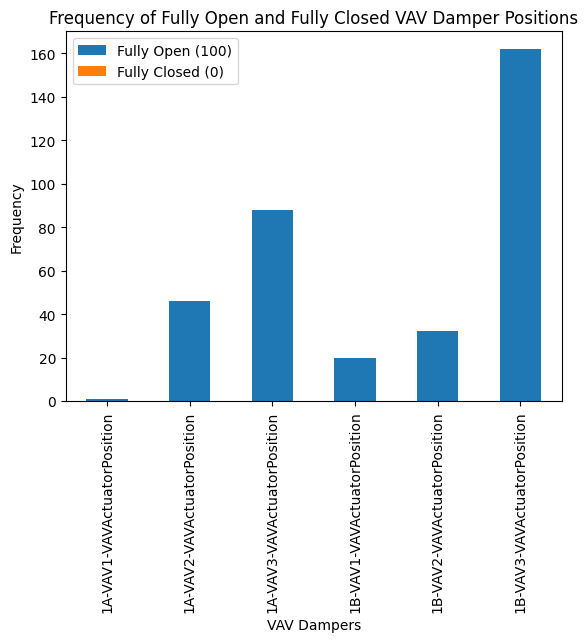

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime' code='def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    \n    # Extract the VAV Actuator Position columns\n    vav_columns = [col for col in ts_df.columns if \'VAVActuatorPosition\' in col]\n    \n    # Initialize counters for fully open and fully closed positions\n    fully_open_count = {col: 0 for col in vav_columns}\n    fully_closed_count = {col: 0 for col in vav_columns}\n    \n    # Iterate through each VAV column and count fully open (100) and fully closed (0) positions\n    for col in vav_columns:\n        fully_open_count[col] = ts_df[col].value_counts().get(100, 0)\n        fully_closed_count[col] = ts_df[col].value_counts().get(0, 0)\n    \n    # Print the results\n    print("Fully Open Positions Count:")\n    for col, count in fully_open_count.items():\n        print(f"{col}:

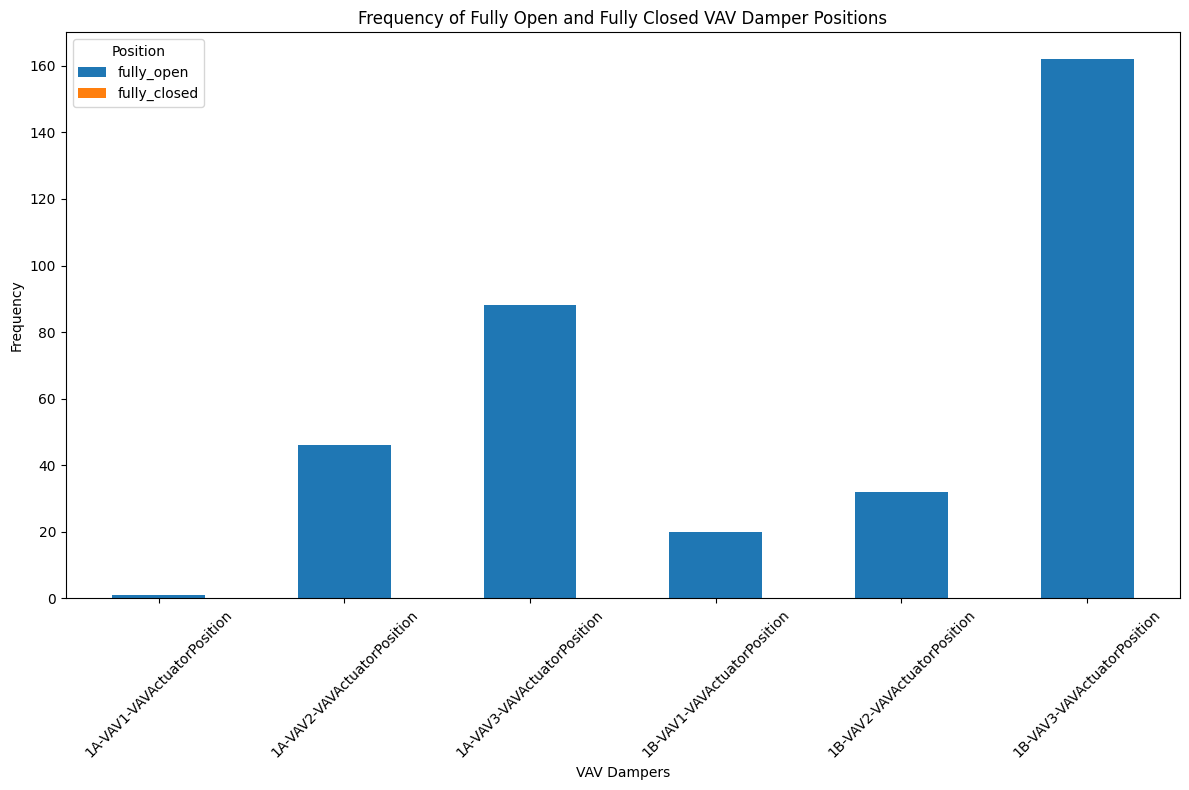

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime' code='def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    \n    # Initialize counters for fully open and fully closed positions\n    fully_open_count = 0\n    fully_closed_count = 0\n    \n    # Iterate over each column except the datetime column\n    for column in ts_df.columns[1:]:\n        # Count the number of times the VAV damper is fully open (100) or fully closed (0)\n        fully_open_count += ts_df[column].value_counts().get(100, 0)\n        fully_closed_count += ts_df[column].value_counts().get(0, 0)\n    \n    # Print the results\n    print(f"The VAV dampers reach their fully open position (100) {fully_open_count} times.")\n    print(f"The VAV dampers reach their fully closed position (0) {fully_closed_count} times.")' description='Schema for code solutions to questions regardi

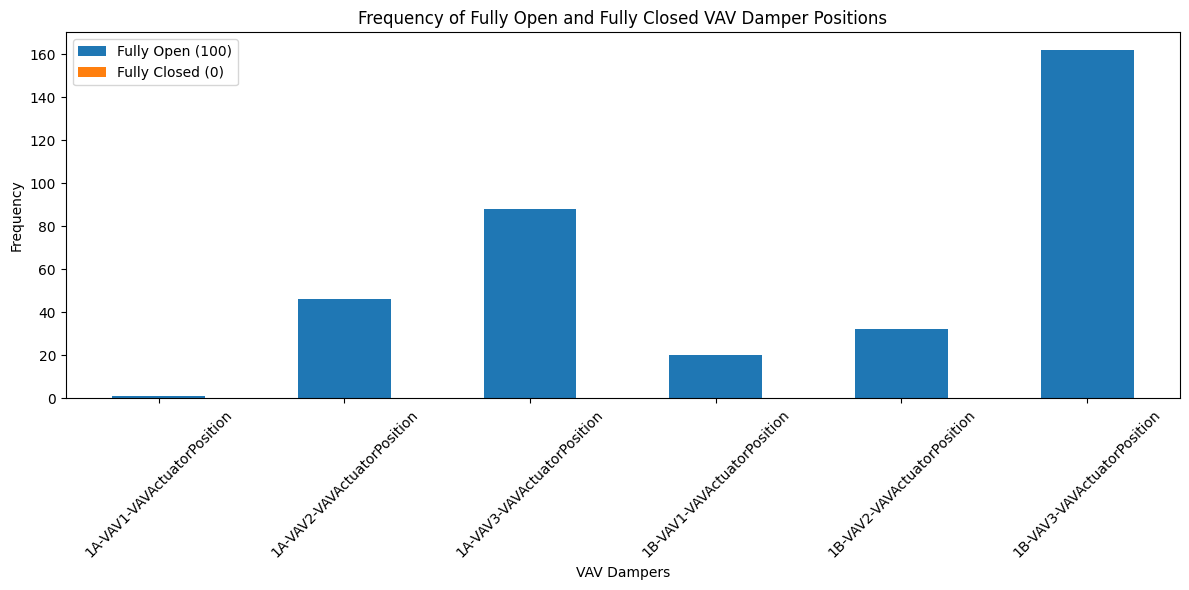

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime' code="def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])\n    \n    # Extract the VAV Actuator Position columns\n    vav_columns = [col for col in ts_df.columns if 'VAVActuatorPosition' in col]\n    \n    # Initialize counters for fully open (100) and fully closed (0) positions\n    fully_open_count = {col: 0 for col in vav_columns}\n    fully_closed_count = {col: 0 for col in vav_columns}\n    \n    # Iterate through each VAV column and count fully open and fully closed positions\n    for col in vav_columns:\n        fully_open_count[col] = ts_df[col].value_counts().get(100, 0)\n        fully_closed_count[col] = ts_df[col].value_counts().get(0, 0)\n    \n    # Print the results\n    print('Frequency of VAV dampers reaching fully open (100) positions:')\n    for col, count in fully_open_count.item

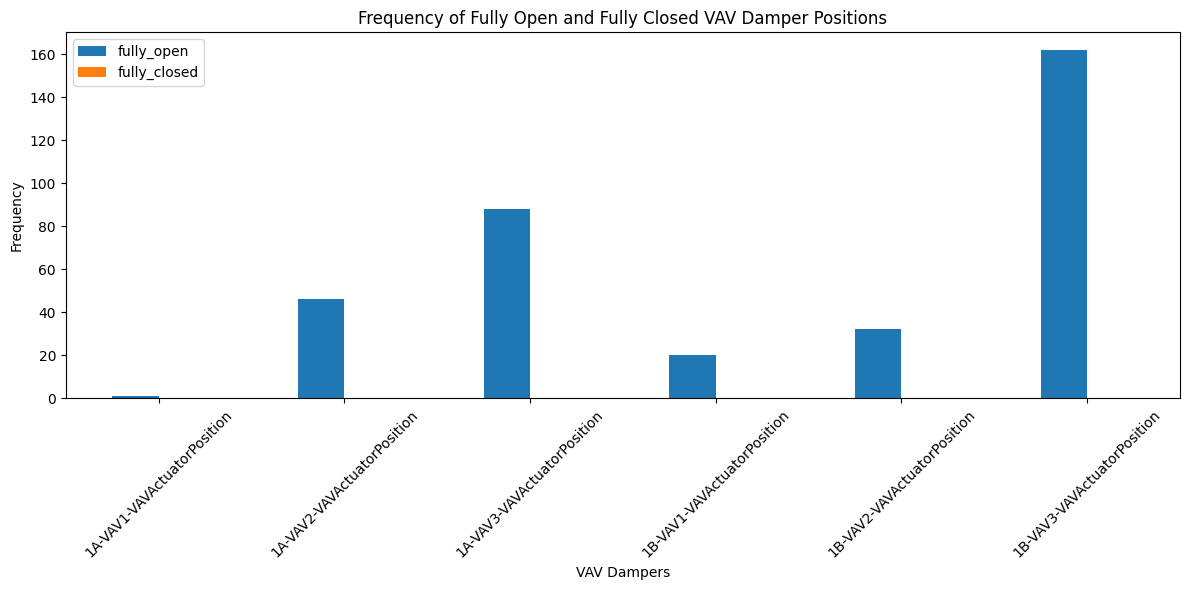

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime' code='def computation_data(ts_df):\n    # Convert the \'datetime\' column to datetime objects\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    \n    # Initialize counters for fully open (100) and fully closed (0) positions\n    fully_open_count = 0\n    fully_closed_count = 0\n    \n    # Iterate over each column except \'datetime\'\n    for column in ts_df.columns[1:]:\n        fully_open_count += ts_df[column].value_counts().get(100, 0)\n        fully_closed_count += ts_df[column].value_counts().get(0, 0)\n    \n    # Print the results\n    print(f"Fully open positions (100%): {fully_open_count}")\n    print(f"Fully closed positions (0%): {fully_closed_count}")' description='Count the number of times VAV dampers reach fully open (100%) or fully closed (0%) positions.'
import pandas as pd
from datetime import datetime
def computation_data(ts_df):
    # Convert the 'da

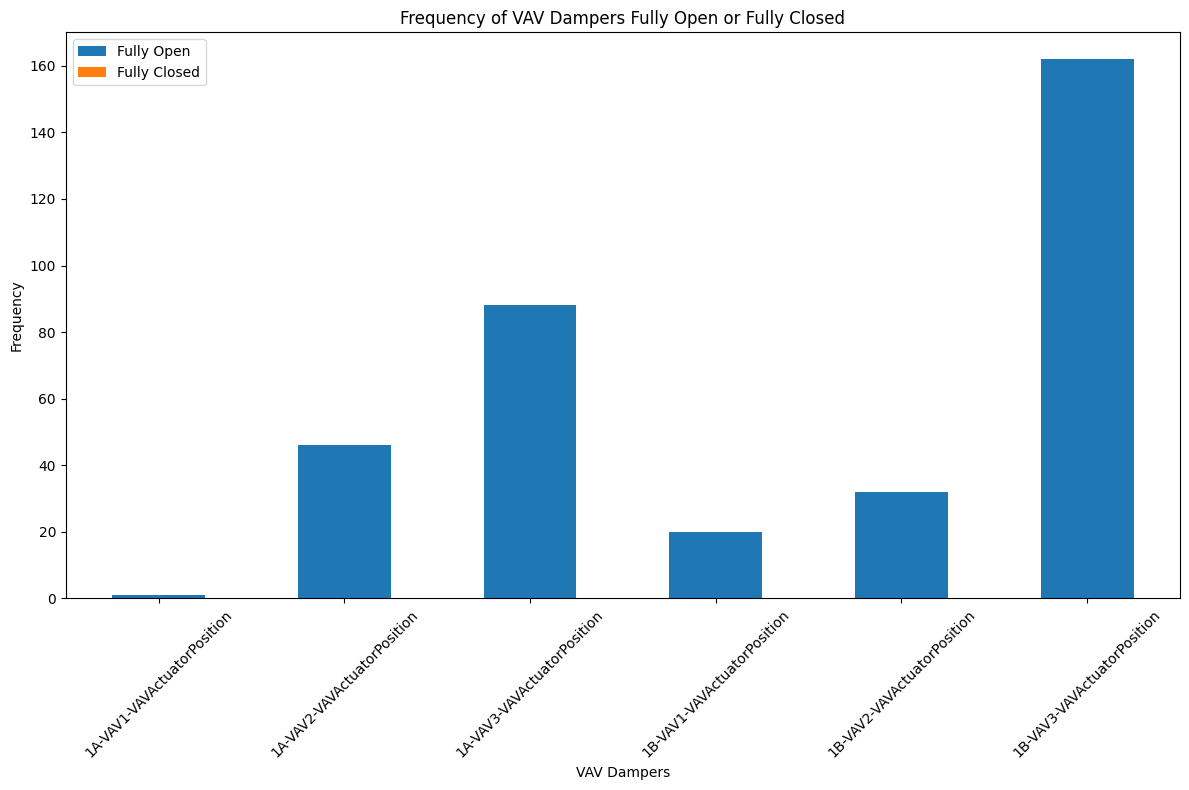

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime, timedelta' code="def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])\n    \n    # Extract the VAV Actuator Position columns\n    vav_columns = [col for col in ts_df.columns if 'VAVActuatorPosition' in col]\n    \n    # Initialize counters for fully open (100) and fully closed (0) positions\n    fully_open_count = {col: 0 for col in vav_columns}\n    fully_closed_count = {col: 0 for col in vav_columns}\n    \n    # Iterate through each row and count fully open and fully closed positions\n    for index, row in ts_df.iterrows():\n        for col in vav_columns:\n            if row[col] == 100:\n                fully_open_count[col] += 1\n            elif row[col] == 0:\n                fully_closed_count[col] += 1\n    \n    # Print the results\n    print('Fully Open Positions Count:')\n    for col, c

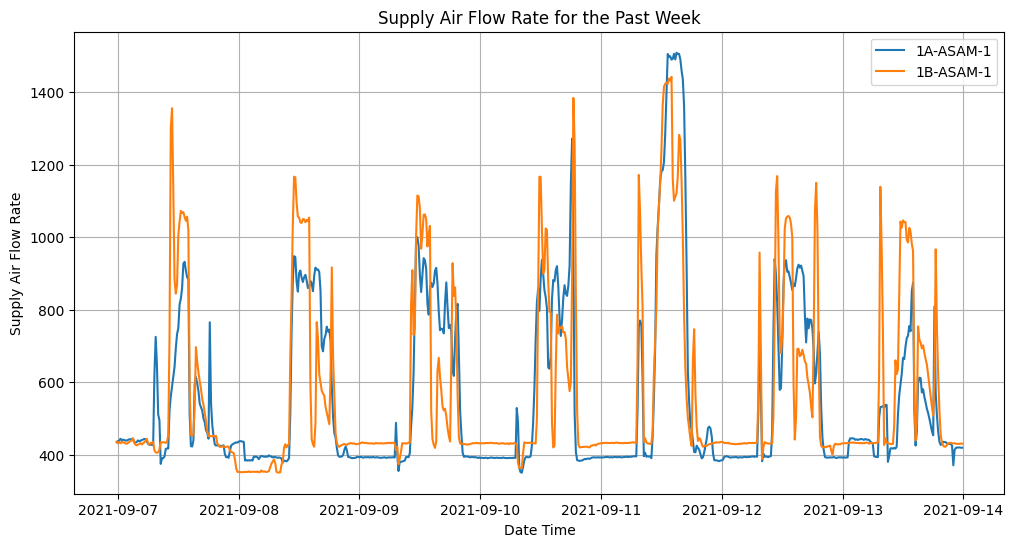

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime, timedelta' code="def computation_data(ts_df):\n    # Extract the latest timestamp in the dataset\n    current_time = pd.to_datetime(ts_df['datetime']).max()\n    \n    # Calculate the timestamp for one week ago\n    one_week_ago = current_time - timedelta(weeks=1)\n    \n    # Filter the dataframe for the past week\n    ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])\n    past_week_df = ts_df[ts_df['datetime'] >= one_week_ago]\n    \n    # Extract the supply air flow rate columns\n    supply_air_flow_rate_columns = ['1A-ASAM-1', '1B-ASAM-1']\n    \n    # Calculate the range of values for each column\n    result = {}\n    for column in supply_air_flow_rate_columns:\n        if column in past_week_df.columns:\n            min_value = past_week_df[column].min()\n            max_value = past_week_df[column].max()\n            result[column] = {'min': min_value, 'max': max_value}\n    \

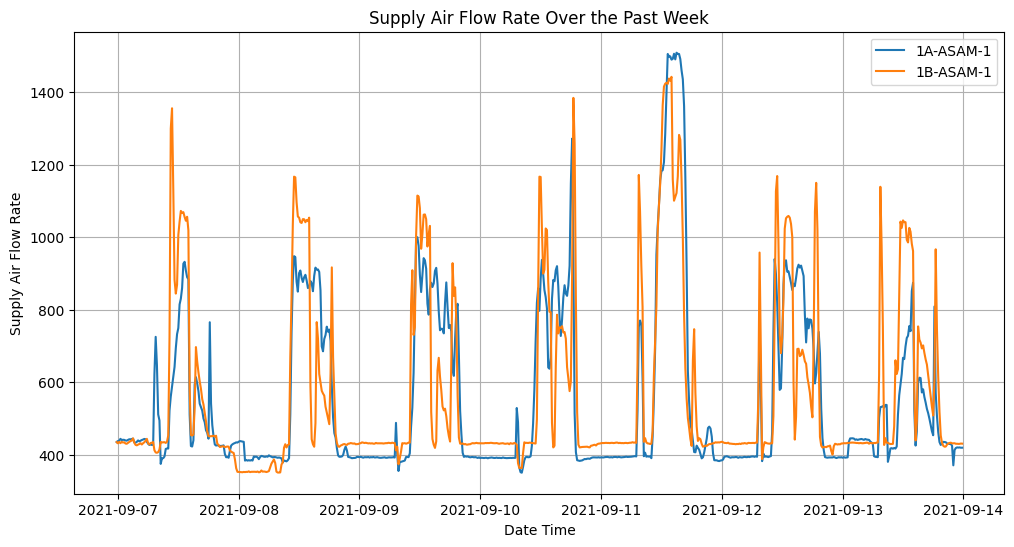

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime, timedelta' code='def computation_data(ts_df):\n    # Extract the latest timestamp in the dataset\n    latest_timestamp = pd.to_datetime(ts_df[\'datetime\']).max()\n    \n    # Calculate the timestamp for one week ago\n    one_week_ago = latest_timestamp - timedelta(weeks=1)\n    \n    # Filter the dataframe for the past week\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    past_week_df = ts_df[ts_df[\'datetime\'] >= one_week_ago]\n    \n    # Extract the supply air flow rate values (assuming \'1A-ASAM-1\' is the supply air flow rate column)\n    supply_air_flow_rate = past_week_df[\'1A-ASAM-1\']\n    \n    # Calculate the range of values\n    min_value = supply_air_flow_rate.min()\n    max_value = supply_air_flow_rate.max()\n    \n    # Print the result\n    print(f"The range of supply air flow rate values for the past week is from {min_value} to {max_value}.")' descri

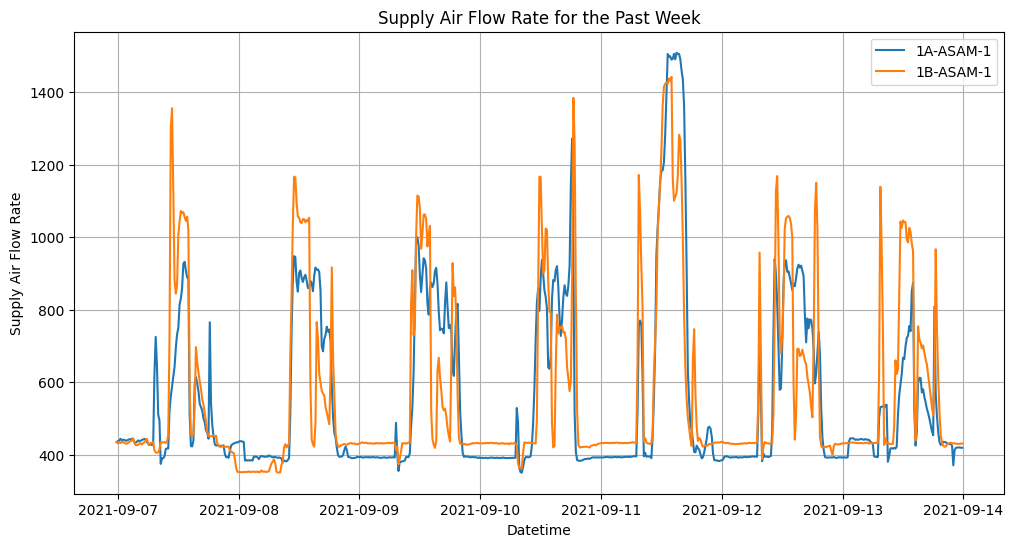

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime, timedelta' code='def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    \n    # Get the current time from the latest timestamp in the dataset\n    current_time = ts_df[\'datetime\'].max()\n    \n    # Calculate the time one week ago from the current time\n    one_week_ago = current_time - timedelta(weeks=1)\n    \n    # Filter the dataframe for the past week\n    past_week_df = ts_df[ts_df[\'datetime\'] >= one_week_ago]\n    \n    # Extract the supply air flow rate values (assuming the column is \'1A-ASAM-1\')\n    supply_air_flow_rate = past_week_df[\'1A-ASAM-1\'].dropna()\n    \n    # Calculate the range of values\n    min_value = supply_air_flow_rate.min()\n    max_value = supply_air_flow_rate.max()\n    \n    # Print the result\n    print(f"The range of supply air flow rate values for the

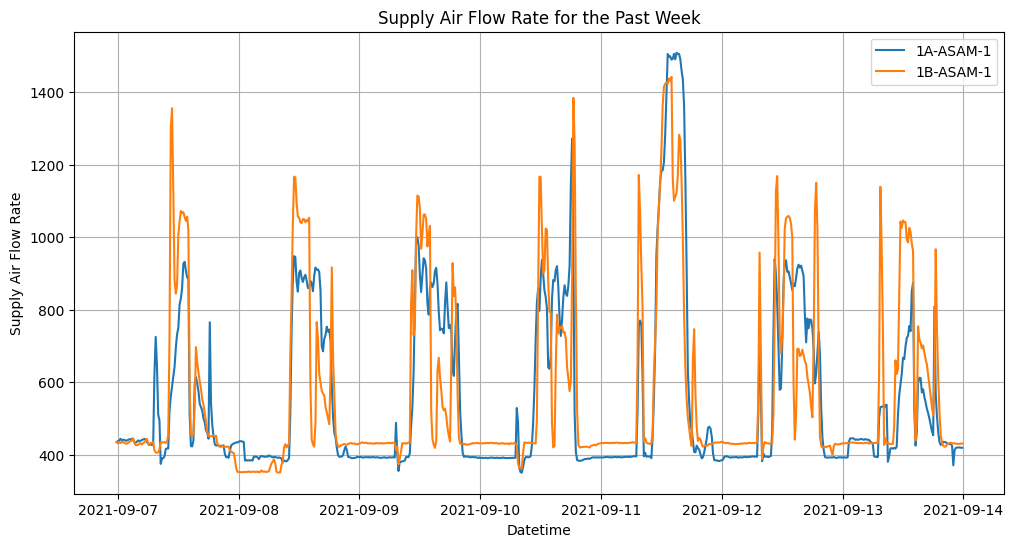

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime, timedelta' code="def computation_data(ts_df):\n    # Convert the 'datetime' column to datetime objects\n    ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])\n    \n    # Get the latest timestamp in the dataset\n    current_time = ts_df['datetime'].max()\n    \n    # Calculate the timestamp for one week ago\n    one_week_ago = current_time - timedelta(weeks=1)\n    \n    # Filter the dataframe for the past week\n    past_week_df = ts_df[ts_df['datetime'] >= one_week_ago]\n    \n    # Extract the supply air flow rate columns\n    supply_air_flow_rate_columns = ['1A-ASAM-1', '1B-ASAM-1']\n    \n    # Calculate the range of values for each column\n    result = {}\n    for column in supply_air_flow_rate_columns:\n        if column in past_week_df.columns:\n            min_value = past_week_df[column].min()\n            max_value = past_week_df[column].max()\n            result[column] = 

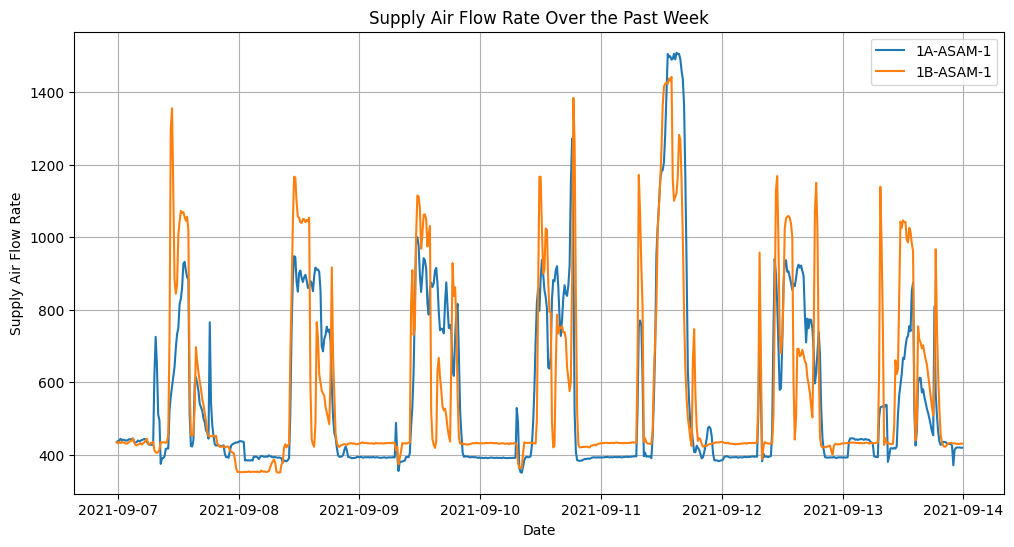

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nfrom datetime import datetime, timedelta' code='def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    \n    # Get the current time from the latest timestamp in the dataset\n    current_time = ts_df[\'datetime\'].max()\n    \n    # Calculate the start of the past week\n    past_week_start = current_time - timedelta(weeks=1)\n    \n    # Filter the dataframe for the past week\n    past_week_df = ts_df[ts_df[\'datetime\'] >= past_week_start]\n    \n    # Extract the supply air flow rate values (assuming it\'s the column \'1A-ASAM-1\')\n    supply_air_flow = past_week_df[\'1A-ASAM-1\'].dropna()\n    \n    # Calculate the range of values\n    min_value = supply_air_flow.min()\n    max_value = supply_air_flow.max()\n    \n    # Print the result\n    print(f"The range of supply air flow rate values for the past week is from {min

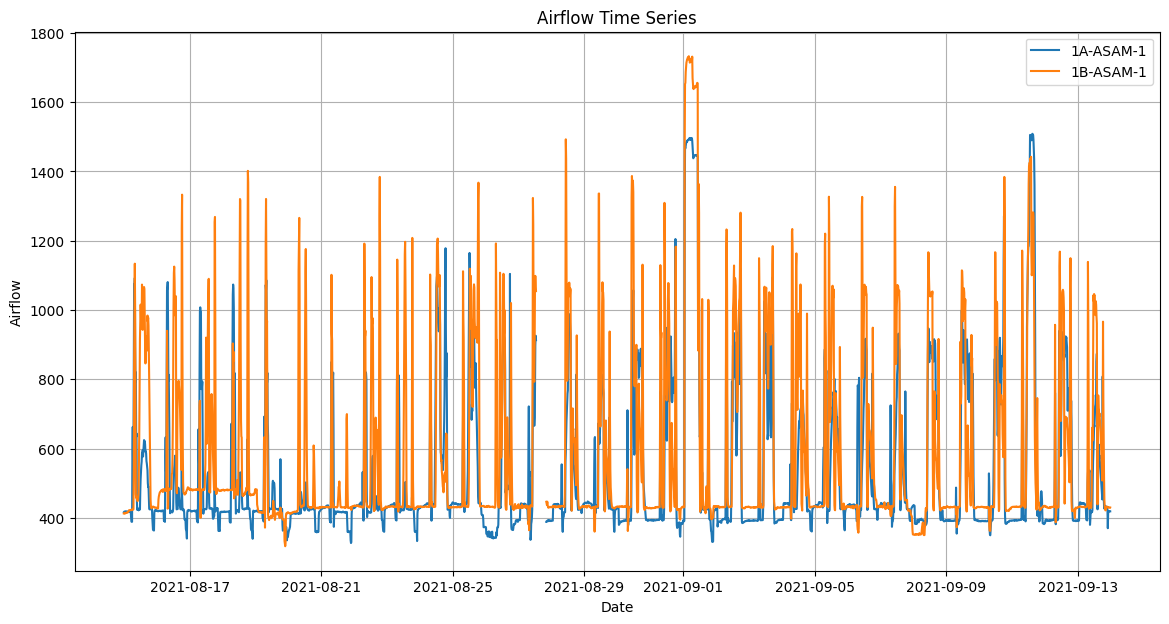

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code="def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])\n    \n    # Set the datetime column as the index\n    ts_df.set_index('datetime', inplace=True)\n    \n    # Calculate the difference between consecutive values to find drops\n    ts_df['1A-ASAM-1_diff'] = ts_df['1A-ASAM-1'].diff()\n    ts_df['1B-ASAM-1_diff'] = ts_df['1B-ASAM-1'].diff()\n    \n    # Define a threshold for significant drops (e.g., more than 10% drop)\n    threshold_1A = ts_df['1A-ASAM-1'].mean() * 0.1\n    threshold_1B = ts_df['1B-ASAM-1'].mean() * 0.1\n    \n    # Find significant drops\n    significant_drops_1A = ts_df[ts_df['1A-ASAM-1_diff'] < -threshold_1A]\n    significant_drops_1B = ts_df[ts_df['1B-ASAM-1_diff'] < -threshold_1B]\n    \n    # Print the results\n    print('Significant drops in 1A-ASAM-1 airflow:')\n    print(signi

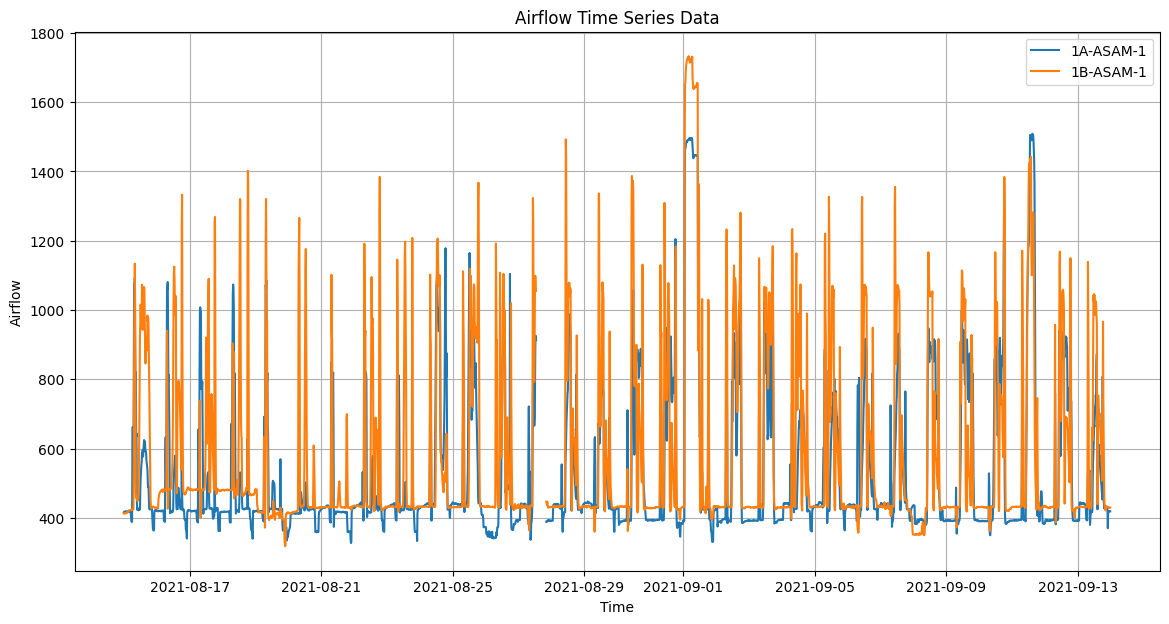

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code='def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df[\'datetime\'] = pd.to_datetime(ts_df[\'datetime\'])\n    ts_df.set_index(\'datetime\', inplace=True)\n\n    # Calculate the difference between consecutive readings\n    diff_1A = ts_df[\'1A-ASAM-1\'].diff()\n    diff_1B = ts_df[\'1B-ASAM-1\'].diff()\n\n    # Define a threshold for significant drops (e.g., more than 10% drop)\n    threshold_1A = ts_df[\'1A-ASAM-1\'].mean() * -0.1\n    threshold_1B = ts_df[\'1B-ASAM-1\'].mean() * -0.1\n\n    # Identify significant drops\n    significant_drops_1A = diff_1A[diff_1A < threshold_1A]\n    significant_drops_1B = diff_1B[diff_1B < threshold_1B]\n\n    # Print the results\n    print("Significant drops in 1A-ASAM-1 airflow:")\n    print(significant_drops_1A.dropna())\n    print("\\nSignificant drops in 1B-ASAM-1 airflow:")\n    print(significant_drops_1B.dropn

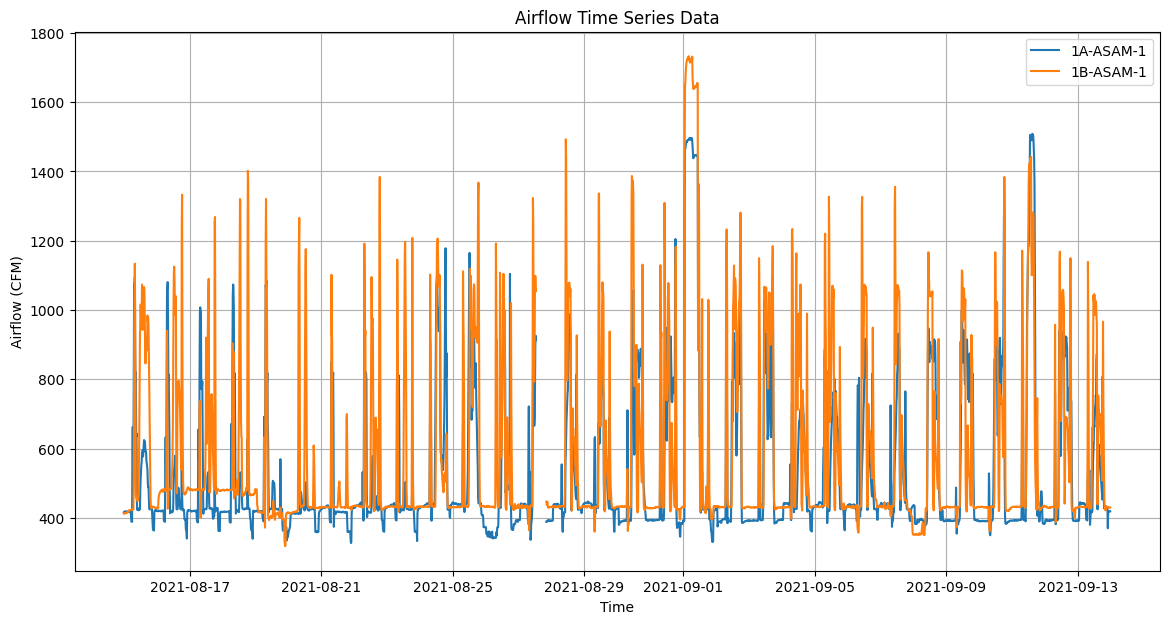

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code="def computation_data(ts_df):\n    # Convert the datetime column to datetime objects\n    ts_df['datetime'] = pd.to_datetime(ts_df['datetime'])\n    ts_df.set_index('datetime', inplace=True)\n\n    # Calculate the difference between consecutive readings\n    diff_1A = ts_df['1A-ASAM-1'].diff()\n    diff_1B = ts_df['1B-ASAM-1'].diff()\n\n    # Define a threshold for significant drops (e.g., a drop of more than 50 units)\n    threshold = -50\n\n    # Find significant drops\n    significant_drops_1A = diff_1A[diff_1A < threshold]\n    significant_drops_1B = diff_1B[diff_1B < threshold]\n\n    # Print the results\n    print('Significant drops in 1A-ASAM-1 airflow:')\n    print(significant_drops_1A)\n    print('\\nSignificant drops in 1B-ASAM-1 airflow:')\n    print(significant_drops_1B)" description='Schema for code solutions to questions regarding data collected from a building.'
import pandas as

In [3]:
import pandas as pd
import os
import time

# Define the list of questions
questions = [
    "How frequently do the VAV dampers reach their fully open or fully closed positions?",
    "What is the range of values for the supply air flow rate this past week?",
    "Are there any significant drops in airflow that could indicate potential blockages?"
]

# Define the model and parameters
model_name = "openai/gpt-4o"
max_iterations = 3

# Initialize an empty DataFrame or load existing results
csv_file = 'ashrae_results.csv'
if os.path.exists(csv_file):
    df_results = pd.read_csv(csv_file)
else:
    df_results = pd.DataFrame()

# Function to update the DataFrame

def update_dataframe(sol, question, run_number, duration, label):
    new_data = pd.DataFrame({
        'question': [question],
        'messages': [sol.get('messages', [])],
        'final_query': [sol.get('final_query', '')],
        'query_result': [sol.get('query_result', '')],
        'query_success': [sol.get('query_success', False)],
        'iterations': [sol.get('iterations', 0)],
        'ts_string': [sol.get('ts_string', '')],
        'func_called': [sol.get('func_called', '')],
        'prompt_tokens': [sol.get('prompt_tokens', 0)],
        'total_tokens': [sol.get('total_tokens', 0)],
        'completion_tokens': [sol.get('completion_tokens', 0)],
        'cost': [sol.get('cost', 0.0)],
        'data_success': [sol.get('data_success', False)],
        'runs': [run_number],
        'duration': [duration],
        'label': [label]
    })
    
    global df_results
    df_results = pd.concat([df_results, new_data], ignore_index=True)

for question in questions:
    # Run the experiments
    for run_number in range(5):

        try:
            start_time = time.time()
            sol = BuildingQA(question, hvac_queries, model_name, g, max_iterations, data_dir=data_dir)
            duration = (time.time() - start_time) / 60  # Convert to minutes
            label = input(f"Label this run for question: {question}\n")
        except Exception as e:
            sol = {'messages': [str(e)]}  # Store failure reason
            duration = 0
            label = 'fail'
        
        update_dataframe(sol, question, run_number, duration, label)
        print(f"Run {run_number} completed.")

        # Display and save the results
        print(df_results)
        df_results.to_csv(csv_file, index=False, mode='w')


------TEXT2SPARQL-----
Description: "Extracting time series of supply air flow sensors and their corresponding air handling units"
SPARQL: "SELECT ?ahu ?sup ?ts WHERE {
    ?ahu rdf:type brick:Air_Handling_Unit .
    ?sup brick:isPartOf ?ahu. 
    ?sup ref:TimeseriesReference ?ts.
    ?sup rdf:type brick:Supply_Air_Flow_Sensor .
    }"
------------------------------
Description: "Extracting time series of supply air flow sensors and time series of return air flow sensors with their corresponding air handling units"
SPARQL: "
    SELECT ?ahu ?sup_ts ?ret_ts
    WHERE {
        ?ahu rdf:type brick:Air_Handling_Unit .

        ?sup brick:isPartOf ?ahu .
        ?sup rdf:type brick:Supply_Air_Flow_Sensor .
        ?sup ref:TimeseriesReference ?sup_ts .

        ?ret brick:isPartOf ?ahu .
        ?ret rdf:type brick:Return_Air_Flow_Sensor .
        ?ret ref:TimeseriesReference ?ret_ts .
    }
    "
------------------------------
Description: "Extracting time series of damper position sensor

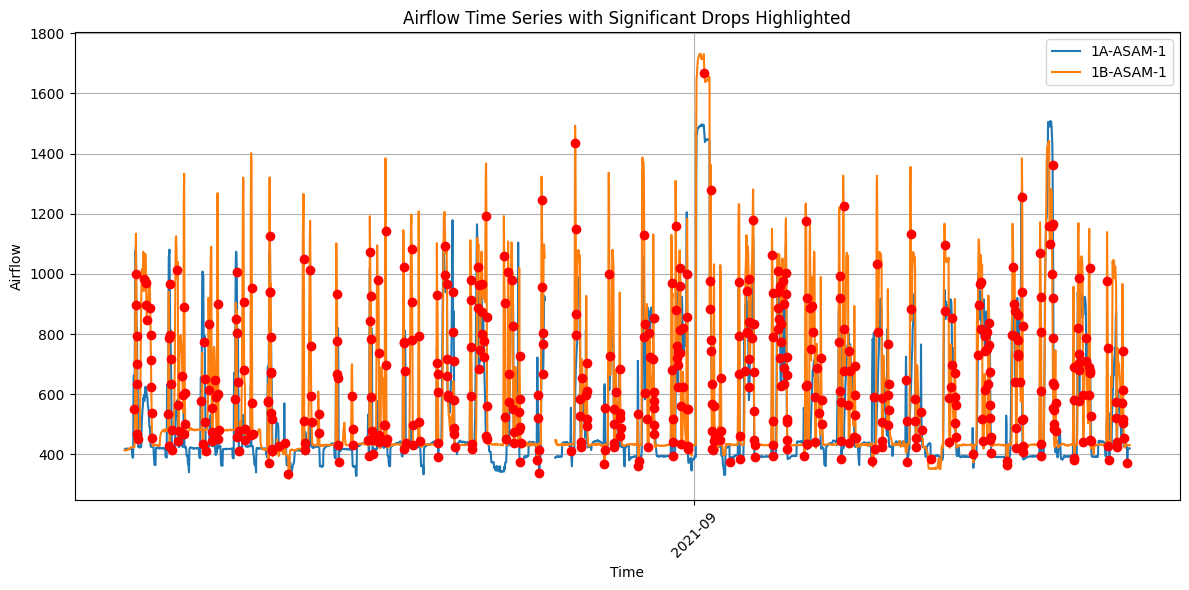

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code='def computation_data(ts_df):\n    # Ensure the index is treated as the time column\n    ts_df.index = pd.to_datetime(ts_df.index, errors=\'coerce\')\n    \n    # Calculate the difference in airflow between consecutive measurements\n    ts_df[\'airflow_diff\'] = ts_df[\'1A-ASAM-1\'].diff()\n    \n    # Define a threshold for significant drops (e.g., more than 10% drop)\n    threshold = -0.1 * ts_df[\'1A-ASAM-1\'].mean()\n    \n    # Identify significant drops\n    significant_drops = ts_df[ts_df[\'airflow_diff\'] < threshold]\n    \n    # Print the results\n    if not significant_drops.empty:\n        print(f"Significant drops in airflow detected at the following times:")\n        print(significant_drops[[\'1A-ASAM-1\', \'airflow_diff\']])\n    else:\n        print("No significant drops in airflow detected.")' description='This function identifies significant drops in airflow that could indica

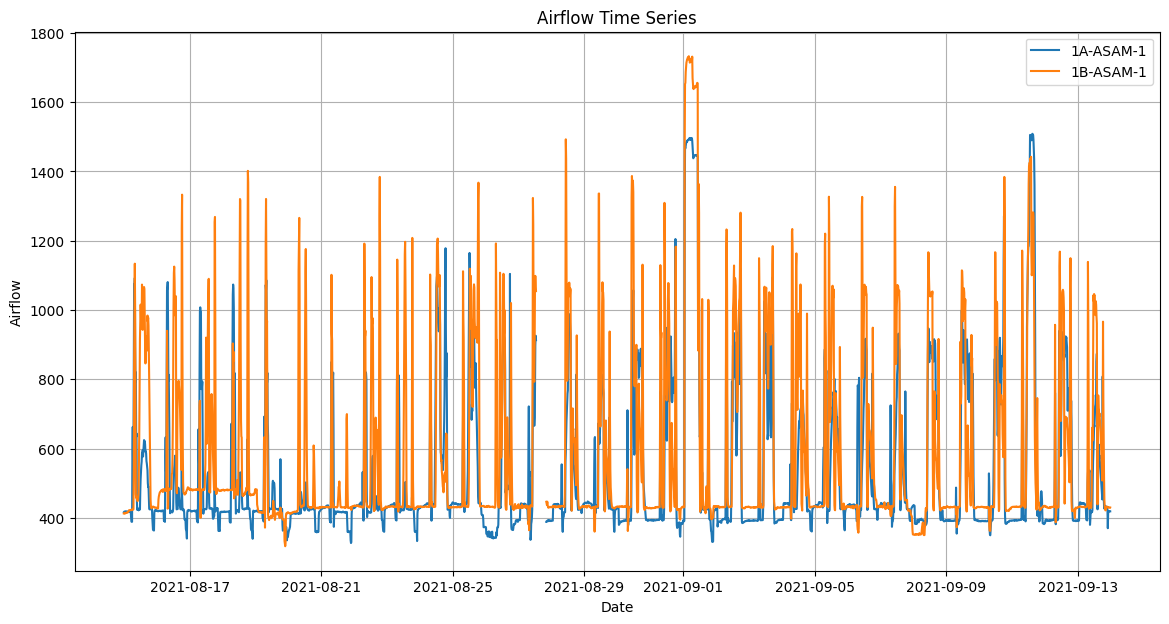

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code='def computation_data(ts_df):\n    # Ensure the index is datetime\n    ts_df.index = pd.to_datetime(ts_df.index, errors=\'coerce\')\n    \n    # Calculate the difference to find drops\n    diff_df = ts_df.diff()\n    \n    # Define a threshold for significant drops (e.g., more than 10% drop)\n    threshold = 0.1\n    \n    # Find significant drops\n    significant_drops = (diff_df / ts_df.shift(1)).abs() > threshold\n    \n    # Filter the rows with significant drops\n    significant_drops = significant_drops[significant_drops.any(axis=1)]\n    \n    # Print the results\n    if not significant_drops.empty:\n        print("Significant drops in airflow detected:")\n        print(significant_drops)\n    else:\n        print("No significant drops in airflow detected.")' description='Schema for code solutions to questions regarding data collected from a building.'
import pandas as pd
import numpy a

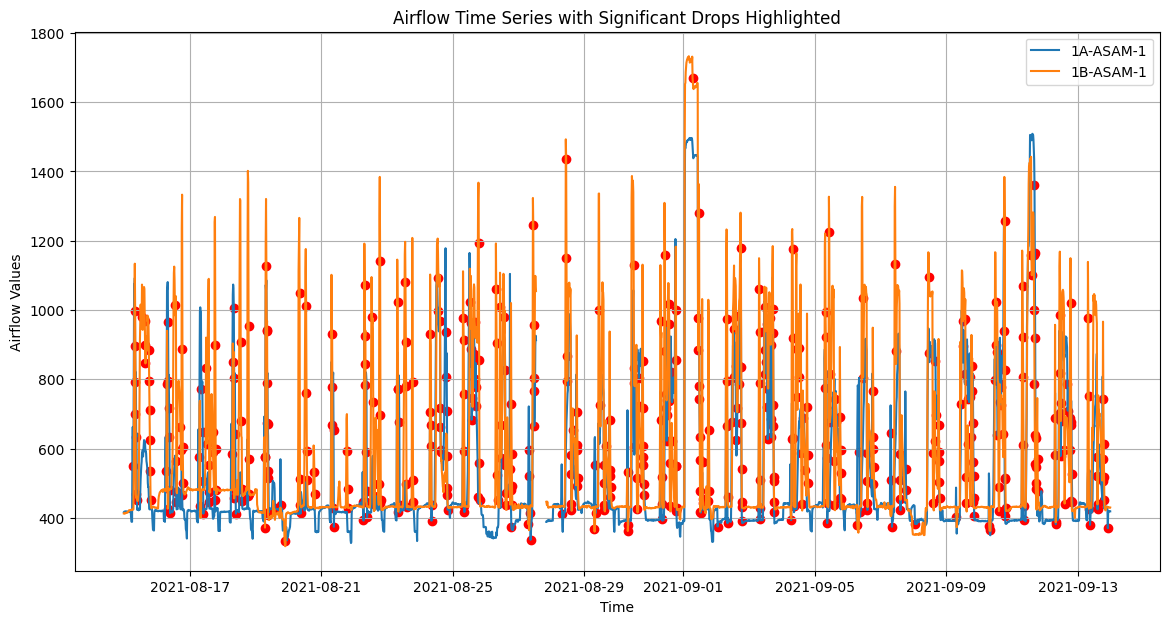

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code='def computation_data(ts_df):\n    # Ensure the index is treated as the time column\n    ts_df.index = pd.to_datetime(ts_df.index, errors=\'coerce\')\n    \n    # Calculate the difference in airflow between consecutive measurements\n    ts_df[\'airflow_diff\'] = ts_df[\'1A-ASAM-1\'].diff()\n    \n    # Define a threshold for significant drops (e.g., more than 10% drop)\n    threshold = -0.1 * ts_df[\'1A-ASAM-1\'].mean()\n    \n    # Identify significant drops\n    significant_drops = ts_df[ts_df[\'airflow_diff\'] < threshold]\n    \n    # Print the results\n    if not significant_drops.empty:\n        print(f"Significant drops in airflow detected at the following times:")\n        print(significant_drops[[\'1A-ASAM-1\', \'airflow_diff\']])\n    else:\n        print("No significant drops in airflow detected.")' description='Schema for code solutions to questions regarding data collected from a 

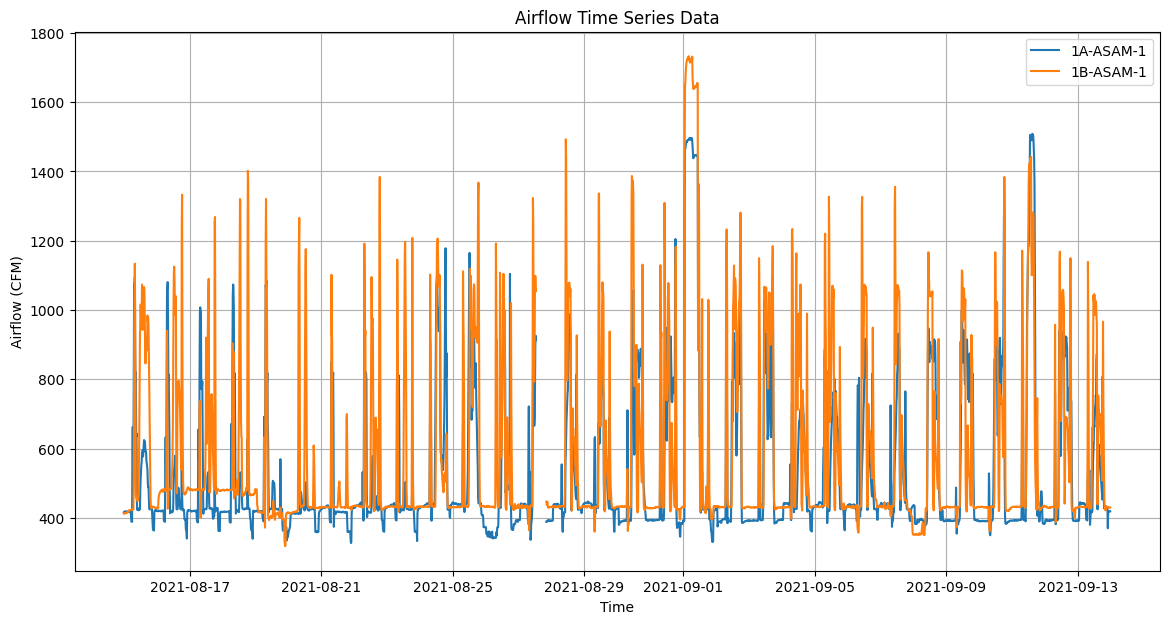

------COMPUTATION CODE GENERATION-----
imports='import pandas as pd\nimport numpy as np' code='def computation_data(ts_df):\n    # Ensure the index is a datetime object\n    ts_df.index = pd.to_datetime(ts_df.index, errors=\'coerce\')\n    \n    # Drop rows with NaT in the index\n    ts_df = ts_df.dropna(subset=[ts_df.index.name])\n    \n    # Calculate the difference between consecutive values to find drops\n    diff_df = ts_df.diff()\n    \n    # Define a threshold for significant drops (e.g., more than 10% drop)\n    threshold = 0.1\n    \n    # Find significant drops\n    significant_drops = (diff_df < -threshold * ts_df.shift(1)).any(axis=1)\n    \n    # Filter the dataframe to only include significant drops\n    drops_df = ts_df[significant_drops]\n    \n    # Print the results\n    if not drops_df.empty:\n        print(f"Significant drops in airflow detected at the following times:")\n        print(drops_df)\n    else:\n        print("No significant drops in airflow detected.")'

In [2]:
import pandas as pd
import os
import time

# Define the list of questions
questions = [
    "Are there any significant drops in airflow that could indicate potential blockages?"
]

# Define the model and parameters
model_name = "openai/gpt-4o"
max_iterations = 3
data_dir = '/Users/ozanbaris/Documents/GitHub/LLM_semantics_trash/FlexLABDB'

# Initialize an empty DataFrame or load existing results
csv_file = 'ashrae_results.csv'
if os.path.exists(csv_file):
    df_results = pd.read_csv(csv_file)
else:
    df_results = pd.DataFrame()

# Function to update the DataFrame

def update_dataframe(sol, question, run_number, duration, label):
    new_data = pd.DataFrame({
        'question': [question],
        'messages': [sol.get('messages', [])],
        'final_query': [sol.get('final_query', '')],
        'query_result': [sol.get('query_result', '')],
        'query_success': [sol.get('query_success', False)],
        'iterations': [sol.get('iterations', 0)],
        'ts_string': [sol.get('ts_string', '')],
        'func_called': [sol.get('func_called', '')],
        'prompt_tokens': [sol.get('prompt_tokens', 0)],
        'total_tokens': [sol.get('total_tokens', 0)],
        'completion_tokens': [sol.get('completion_tokens', 0)],
        'cost': [sol.get('cost', 0.0)],
        'data_success': [sol.get('data_success', False)],
        'runs': [run_number],
        'duration': [duration],
        'label': [label]
    })
    
    global df_results
    df_results = pd.concat([df_results, new_data], ignore_index=True)

for question in questions:
    # Run the experiments
    for run_number in range(5):

        try:
            start_time = time.time()
            sol = BuildingQA(question, hvac_queries, model_name, g, max_iterations, data_dir=data_dir)
            duration = (time.time() - start_time) / 60  # Convert to minutes
            label = input(f"Label this run for question: {question}\n")
        except Exception as e:
            sol = {'messages': [str(e)]}  # Store failure reason
            duration = 0
            label = 'fail'
        
        update_dataframe(sol, question, run_number, duration, label)
        print(f"Run {run_number} completed.")

        # Display and save the results
        print(df_results)
        df_results.to_csv(csv_file, index=False, mode='w')


In [9]:
from sentence_transformers import SentenceTransformer, util

mpnet_v2 = SentenceTransformer('all-mpnet-base-v2')

def find_similar_labels(question, descriptions, hvac_queries, threshold=0.1):
    # Encode the question into an embedding
    ques_embedding = mpnet_v2.encode(question, convert_to_tensor=True)

    similarity_scores = []
    
    for desc in descriptions:
        # Encode the description into an embedding
        desc_embedding = mpnet_v2.encode(desc, convert_to_tensor=True)
        
        # Compute similarity score
        similarity_score = util.pytorch_cos_sim(ques_embedding, desc_embedding).item()
        similarity_scores.append((desc, similarity_score))

    # Sort descriptions by similarity score in descending order
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Select the top 3 descriptions if they exceed the threshold
    top_3_desc = [desc for desc, score in similarity_scores[:3] if score >= threshold]

    # Generate formatted output
    result_string = ""
    for desc in top_3_desc:
        query = hvac_queries.get(desc, "No SPARQL query found.")
        result_string += f'Description: "{desc}"\nSPARQL: "{query}"\n{"-"*30}\n'
    
    print(result_string)  # Print the result
    return result_string  # Return the formatted string if needed

# Example usage
question = "What is the range of values for the supply air flow rate this week?"
question = "What is the daily energy consumption over the last month?"
descriptions = list(hvac_queries.keys())  # Ensure `hvac_queries` is defined
few_shot_string=find_similar_labels(question, descriptions, hvac_queries, threshold=0.1)


Description: "Extracting time series of power sensors and their corresponding equipments, air handling units, and buildings"
SPARQL: "SELECT ?cell ?ahu ?eqp ?sensor ?ts WHERE {
    ?cell rdf:type brick:Building . 
    ?ahu rdf:type brick:Air_Handling_Unit .
    ?ahu brick:isPartOf ?cell .
    ?eqp brick:isPartOf ?ahu .
    ?sensor brick:isPointOf ?eqp  .
    ?sensor ref:TimeseriesReference ?ts.
    ?sensor rdf:type/rdfs:subClassOf* brick:Power_Sensor .
    }"
------------------------------
Description: "Extracting time series of building electrical meters and their corresponding buildings"
SPARQL: "
    SELECT ?building ?meter ?ts
    WHERE {
        ?building rdf:type brick:Building .
        ?meter brick:isPartOf ?building .
        ?meter rdf:type brick:Building_Electrical_Meter .
        ?meter ref:TimeseriesReference ?ts .
    }"
------------------------------
Description: "Extracting time series of zone air temperature sensors and time series of occupied cooling tempetaure setpoi